### <center>Домашнее задание </center>

#### Задание
<div class="alert alert-block alert-info">
    
1. Загрузка текстового файла из корневого каталога.
2. Обработка текстовых данных.
3. Понижение размерности текстовых данных.
</div>

In [13]:
import autopep8

import numpy as np
import pandas as pd

pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)

import re
import string
from collections import Counter
import gc

import spacy 
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#!python -m spacy download en_core_web_lg

#### Обработка текста

In [14]:
# Для векторизации с помощью spaCy нужна большая модель, 
# устанавливается через Anaconda Prompt: 
# python -m spacy download en_core_web_lg

nlp = spacy.load("en_core_web_lg")

In [15]:
def preproc(filename):
    '''
    Функция принимает название файла filename и возвращает:
    - список слов после удаления пунктуации и стоп-слов, лемматизации;
    - словарь уникальных слов (keys) и их частоту (values) с тексте.
    '''    
    with open(filename, encoding="utf8") as f:
        text = f.read()
    
    stop_words = spacy.lang.en.stop_words.STOP_WORDS
    punctuations = string.punctuation

    doc = nlp(text)

    text_lemm = [word.lemma_.lower().strip() if 
                 word.lemma_ != "-PRON-" else 
                 word.lower_ for word in doc]
    
    text_clear = [word for word in text_lemm if 
                  word not in stop_words and 
                  word not in punctuations]
    
    count_words = Counter(text_clear)
    
    print('Количество слов в тексте: '
          '{}.'.format(len(text_clear)))
    print('Количество уникальных слов в тексте: '
          '{}.\n'.format(len(count_words)))
    
    return text_clear, count_words

In [17]:
my_text, count_words = preproc('book.txt')

Количество слов в тексте: 2351.
Количество уникальных слов в тексте: 1282.



In [18]:
count_words.most_common(20)

[('friend', 43),
 ('man', 34),
 ('friendship', 24),
 ('great', 22),
 ('shall', 22),
 ('let', 21),
 ('love', 19),
 ('relation', 19),
 ('nature', 18),
 ('good', 17),
 ('thought', 17),
 ('soul', 16),
 ('heart', 14),
 ('person', 13),
 ('new', 13),
 ('know', 13),
 ('speak', 10),
 ('like', 10),
 ('meet', 10),
 ('conversation', 10)]

In [19]:
len(count_words)

1282

In [ ]:
#0 0 0 0 1
#0 0 0 1 0
#0 0 0 0 1
#0 1 0 0 0
#1 0 0 0 0

Важность слов оценим с помощью TF-IDF.

In [20]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(count_words)

feature_names = vectorizer.get_feature_names()
df = pd.DataFrame(vectors.toarray(), columns=feature_names)

print('Размерность матрицы TF-IDF: '
      '{}.'.format(df.shape))

Размерность матрицы TF-IDF: (1282, 1300).


c:\Users\andru\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
df

,10,11,12,13,...,yonder,you,young,æquat
0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1277,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
1278,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
1279,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
1280,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0


In [22]:
import sklearn
sklearn.__version__ 

'1.1.3'

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
     'This is the first document synchrophasotron.',
    'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
print(X.shape)


array(['and', 'document', 'first', 'is', 'one', 'second',
       'synchrophasotron', 'the', 'third', 'this'], dtype=object)

(4, 10)


In [24]:
X.toarray()[0]

array([0.        , 0.37835697, 0.46734613, 0.30933162, 0.        ,
       0.        , 0.59276931, 0.30933162, 0.        , 0.30933162])

In [25]:
X = scale(df.values)

pca = PCA(n_components=(len(count_words)-1))
pca.fit(X)
# доля от общей дисперсии
var = pca.explained_variance_ratio_  #Процентная дисперсия, объясненная каждым из выбранных компонентов.

var1 = np.cumsum(np.round(var, decimals=5)*100) #round - округление до 5 знака, np.cumsum - комулятивная сумма

PCA(n_components=1281)

In [26]:
var[0:10]

array([0.00180804, 0.00154023, 0.00153966, 0.00153966, 0.00153966,
       0.00153966, 0.00153966, 0.00153966, 0.00153966, 0.00153966])

Сколько компонентов мы должны выбрать для стадии моделирования? 

"Kритерий каменистой осыпи Кеттела" - этот график должен сначала круто уходить вниз, потом ломаться и после точки перелома снижаться гораздо более полого. Все факторы после точки перелома можно отбросить, т.к. процент объясняемой ими дисперсии мал. 

Вот как график выглядит в нашем случае:

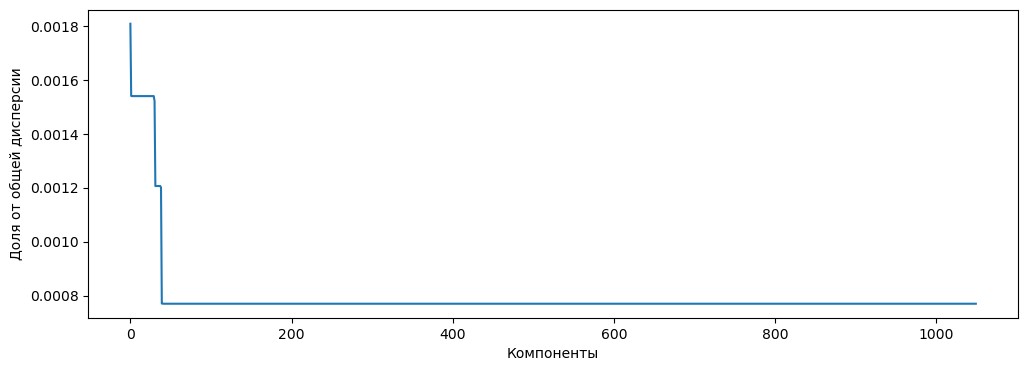

In [32]:
plt.figure(figsize=(12,4))
plt.plot(var)
plt.xlabel('Компоненты', fontsize=10)
plt.ylabel('Доля от общей дисперсии', fontsize=10);

Построим график совокупной дисперсии, это даст более четкое представление о необходимом количестве компонент.

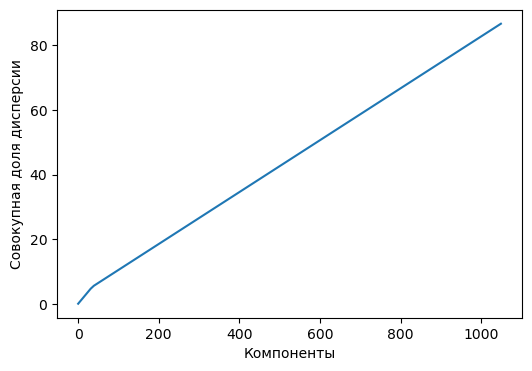

In [33]:
plt.figure(figsize=(6,4))
plt.plot(var1)
plt.xlabel('Компоненты', fontsize=10)
plt.ylabel('Совокупная доля дисперсии', fontsize=10);

Зависимость объясненной совокупной доли дисперсии от количества компонент линейная. График показывает, что для сохранения более 80% информации нужно выбрать количество компонент примерно 1050.

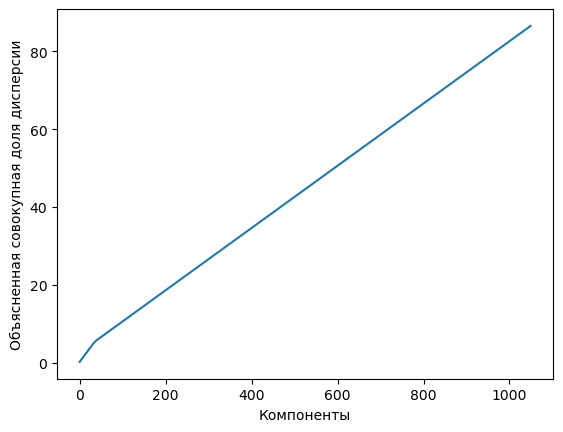

In [27]:
pca = PCA(n_components=1050)
pca.fit(X)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(var, decimals=4)*100)

plt.plot(var1)
plt.xlabel('Компоненты', fontsize=10)
plt.ylabel('Объясненная совокупная доля дисперсии', fontsize=10);

In [18]:
gc.collect() #выполним очистку внутренних коллекций (памяти)

9761

#### Векторизация слов документа

Для векторизации слов в библиотеке spaCy используется __[GloVe](https://nlp.stanford.edu/projects/glove/)__.

In [28]:
df_words = pd.DataFrame.from_dict(count_words, 
                            orient='index').reset_index()
df_words = df_words.rename(columns={'index':'Word', 0:'Count'})
df_words.sort_values(by=['Count'], inplace=True, ascending=False)
df_words

,Word,Count
83,friend,43
133,man,34
0,friendship,24
5,great,22
158,shall,22
...,...,...
580,cowardly,1
582,asylum,1
583,valiant,1
584,warrior[295,1


In [20]:
#dfs = df_words['Word'][1:1000]

In [21]:
#word_vector_list = [nlp(word).vector for word in dfs]

Получим список векторизированных слов текста: 

In [29]:
def get_word_vectors(words):
    '''
    Функция конвертирует список слов в их векторное представление
    '''
    ar = []
    for i in words:
        ar.append(nlp(i).vector)
    return ar
    #return [nlp(word).vector for word in words]

word_vector_list = get_word_vectors(df_words['Word'])

In [30]:
df_vec = pd.DataFrame(word_vector_list)
df_vect = df_vec.T
df_vect.columns = df_words['Word']

In [31]:
df_vect
df_vect.shape

Word,friend,man,friendship,great,...,asylum,valiant,warrior[295,deify
0,0.15642,-1.28670,-0.50713,0.24141,...,-3.987800,-0.255930,0.0,-0.354810
1,-1.11530,-0.79920,-0.77919,-3.36100,...,3.503100,-0.095852,0.0,0.060892
2,-2.97990,-2.09200,-2.50790,-5.12850,...,-0.045758,1.164000,0.0,0.260430
3,-3.07220,-0.77679,-2.51230,-2.21610,...,2.798300,0.576160,0.0,0.106120
4,0.22619,-2.50570,3.87700,3.19130,...,-2.554600,2.836000,0.0,0.090555
...,...,...,...,...,...,...,...,...,...
295,-2.15640,-3.33120,-1.76390,-2.63270,...,2.965800,0.277040,0.0,0.825540
296,1.22900,4.83770,1.06950,-3.08260,...,-1.060100,-1.523000,0.0,0.264640
297,4.64940,8.82060,0.89756,1.20290,...,-2.238800,-1.183700,0.0,0.594050
298,-2.55070,0.18837,-3.35300,-6.20810,...,1.790900,-2.513400,0.0,0.409740


(300, 1282)

In [36]:
word_vector_list[0].shape

(300,)

In [44]:
word_vector_list[0]

array([ 1.5642e-01, -1.1153e+00, -2.9799e+00, -3.0722e+00,  2.2619e-01,
       -1.0016e+00,  2.6097e+00,  9.6057e-01,  9.2852e-01,  1.1782e+00,
        6.0568e+00,  1.7765e-01, -2.9446e+00,  5.2775e+00,  1.3939e+00,
       -1.7001e+00,  1.2627e+00, -5.2577e+00,  1.4792e+00,  2.8943e+00,
       -1.9258e+00,  8.7082e-01,  1.2827e+00, -4.0440e+00,  3.0635e+00,
       -1.1543e+00, -5.0277e+00,  2.2470e+00,  3.2001e+00, -3.7952e+00,
        2.0623e+00,  1.0221e+00, -3.3081e+00,  2.5646e+00, -2.7990e-01,
        5.4460e-01, -3.7926e+00,  2.7823e-02, -1.1942e+00, -2.6621e+00,
       -4.0024e+00, -6.4530e-01,  5.1756e+00, -5.3262e-01,  3.6169e+00,
       -8.3909e-01, -3.1341e+00, -7.6773e-01, -2.5205e-01,  4.1167e+00,
       -1.1559e-02, -2.1502e+00,  2.8674e+00, -2.0433e+00, -6.0578e-01,
       -3.3063e+00,  1.3096e+00, -6.9489e-01,  3.0575e+00, -1.2122e-01,
        1.6326e+00,  1.9763e-02, -1.1694e+00,  2.9679e-01, -5.0716e-01,
       -1.7099e+00, -3.4353e-01, -3.2673e+00,  2.2336e+00,  2.64

In [31]:
gc.collect()

120

В результате векторизации слов текста с помощью __[GloVe](https://nlp.stanford.edu/projects/glove/)__ вместо матрицы размером 1107 × 1111 (TF-IDF) получили матрицу 300 х 1107. 

Векторы, которые мы используем, имеют 300 измерений. Можно с помощью PCA спроецировать векторы на 2 измерения, визуализировать их и посмотреть расстояние между словами в двух измерениях.

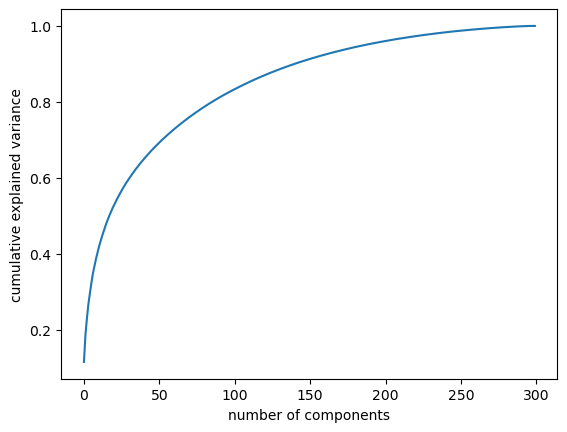

In [37]:
pca = PCA().fit(word_vector_list)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

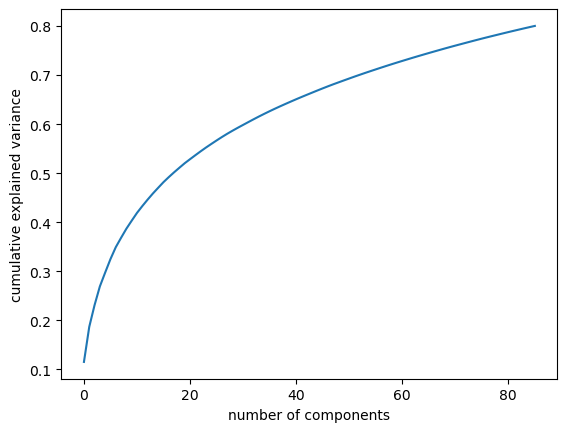

In [38]:
pca = PCA(0.8).fit(word_vector_list)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [42]:
# Возьмем для примера первые 13 слов из списка уникальных
words = df_words['Word'][:50]
print(list(words))

# Задаем 2 измерения
pca = PCA(n_components=2)
pca.fit(get_word_vectors(words))
word_vecs_2d = pca.transform(get_word_vectors(words))

word_vecs_2d

['friend', 'man', 'friendship', 'great', 'shall', 'let', 'love', 'relation', 'nature', 'good', 'thought', 'soul', 'heart', 'new', 'person', 'know', 'god', 'like', 'come', 'speak', 'conversation', 'meet', 'leave', 'high', 'true', 'time', 'world', 'feel', 'find', 'fear', 'stand', 'hear', 'society', 'joy', 'respect', 'thy', 'old', 'virtue', 'life', 'fine', 'stranger', 'law', 'sure', 'beautiful', 'book', 'thou', 'lose', 'power', 'wish', 'noble']


PCA(n_components=2)

array([[-3.11014455e+00,  2.68705085e+00],
       [-2.64847408e+00,  2.50323146e+01],
       [ 2.41110230e+00,  1.84473762e+00],
       [-2.38895771e+00, -9.42336167e+00],
       [ 1.44980692e+01,  2.13096282e+01],
       [-2.51296342e+01, -2.20879187e+00],
       [-1.90211202e+01,  6.77221974e+00],
       [ 3.52952304e+01, -1.11821983e+01],
       [ 2.11563119e+01,  9.24758935e-01],
       [-7.84918498e+00, -8.82348517e+00],
       [ 2.12279717e-01, -5.24017431e+00],
       [-7.84163272e+00,  2.99510831e+01],
       [-3.87771416e+00,  1.22941530e+01],
       [ 1.40518690e+01, -2.60344191e+01],
       [ 1.12356301e+01,  1.55645549e+00],
       [-1.59559656e+01, -1.24471815e+01],
       [-4.54290294e+00,  3.34388576e+01],
       [-1.10897030e+01, -1.15510776e+01],
       [-1.22817196e+01, -1.73075653e+01],
       [-8.48594466e+00, -1.01816031e+01],
       [ 1.22430029e+01, -9.14977557e+00],
       [-9.92043750e+00, -3.03702468e+01],
       [-1.15017075e+01, -1.37475170e+01],
       [ 2.

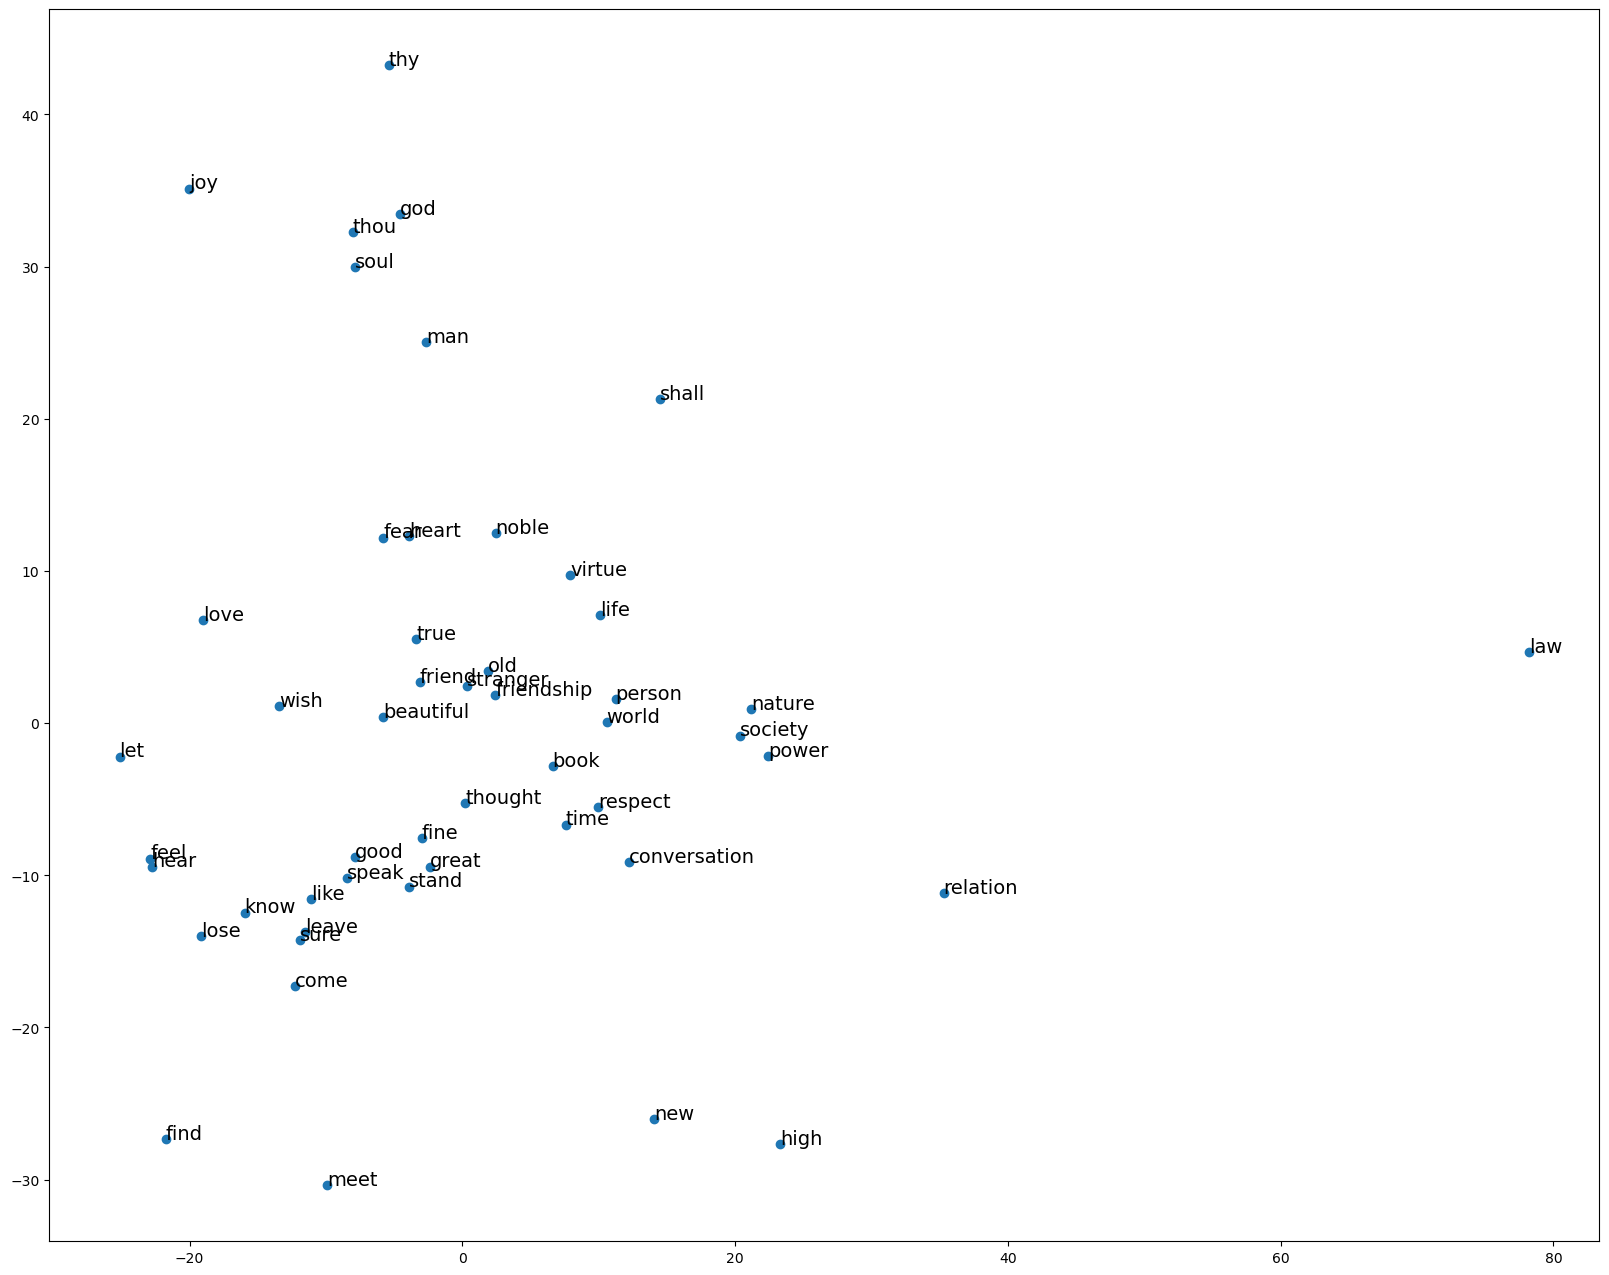

In [43]:
plt.figure(figsize=(20,16))
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# Подпишем слова 
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size=14)

plt.show();

### Вывод

1. Использование векторов слов значительно эффективнее по сравнению с методикой TF-IDF.

2. Скорее всего не все слова были векторизированы. Можно продолжить работу над такими словами ('OOV' - 'out of vocabulary'), определив, например, единый вектор для всех слов, не входящих в словарь, или используя другие модели векторов слов, такие как `FastText`, которые могут синтезировать векторы. 